# Credit EDA Case Study

Import Python Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
#Read both the dataset 

NewApplication = pd.read_csv('application_data.csv')
PreviousApplication = pd.read_csv('previous_application.csv')


In [9]:
NewApplication.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
NewApplication.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
NewApplication.shape

(307511, 122)

Data Cleaning for New Application Dataset.


In [13]:
NewApplication.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [14]:
NewApplication.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [15]:
# checking columns having null values for more than 40%
drop_cols=NewApplication.isnull().sum()
drop_cols=drop_cols[drop_cols.values>(0.40*len(NewApplication))] 
len(drop_cols)

49

In [17]:
drop_cols= list(drop_cols[drop_cols.values>=0.40].index)
NewApplication.drop(labels=drop_cols,axis=1,inplace=True)

In [18]:
NewApplication.shape

(307511, 73)

In [20]:
NewApplication.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
NAME_INCOME_TYPE                  0
FLAG_OWN_REALTY                   0
dtype: int64

In [21]:
# Checking Median to impute the values  for missing values.
NewApplication.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [22]:
NewApplication.AMT_ANNUITY.median() 

24903.0

In [23]:
#Imputing the missing values with median.
NewApplication['AMT_ANNUITY']=NewApplication.AMT_ANNUITY.fillna(NewApplication.AMT_ANNUITY.median())

In [24]:
NewApplication['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [25]:
NewApplication.FLAG_DOCUMENT_2.unique()

array([0, 1], dtype=int64)

In [26]:
#We are going to drop all the columns which we do not need for Analysis.
# fetching all columns starting with 'Flag_Documents'
flag_cols=[x for x in NewApplication if x.startswith('FLAG_DOC')] 
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [27]:
# dropping all columns starting with "Flag_Docuuments"
NewApplication.drop(labels=flag_cols,axis=1,inplace=True)

In [28]:
NewApplication.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
dtype: int64

In [30]:
# Checking Median to impute the values  for missing values.
NewApplication.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [32]:
NewApplication.AMT_GOODS_PRICE.median()

450000.0

In [33]:
# Imputing missing values with median for AMT_GOODS_PRICE
NewApplication['AMT_GOODS_PRICE']=NewApplication.AMT_GOODS_PRICE.fillna(NewApplication.AMT_GOODS_PRICE.median())

In [34]:
NewApplication.AMT_GOODS_PRICE.isnull().sum()

0

In [39]:
NewApplication.isna().sum().sort_values(ascending=False).head(20)/len(NewApplication)*100

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_GOODS_PRICE                0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
dtype: float64

In [36]:
NewApplication.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

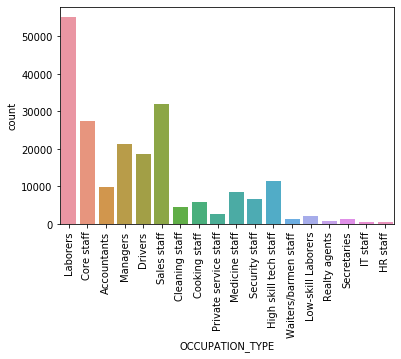

In [37]:
sns.countplot(x='OCCUPATION_TYPE', data=NewApplication)
plt.xticks(rotation=90);

As we can see that Occupation_Type has 31% missing value , and if we replace it with Laborers it wont be fair, so we will just leave it as it is and will not do any missing value treatment

In [41]:
NewApplication.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
AMT_GOODS_PRICE                   0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
dtype: int64

In [42]:
#dropping social circle columns as we will not need it in our analysis.
NewApplication.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [43]:
NewApplication['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

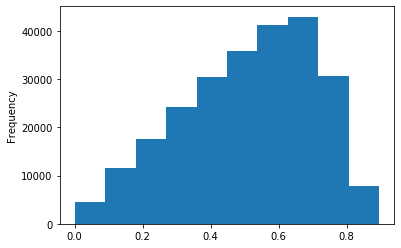

In [44]:
NewApplication['EXT_SOURCE_3'].plot.hist();

In [45]:
# It is skewed type.

NewApplication['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [46]:
#Imputing missing values using mode
NewApplication['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

In [47]:
NewApplication['EXT_SOURCE_3'].fillna(NewApplication['EXT_SOURCE_3'].mode()[0], inplace=True)


In [48]:
NewApplication.EXT_SOURCE_3.isnull().sum()

0

In [49]:
NewApplication['AMT_REQ_CREDIT_BUREAU_YEAR'].head()


0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [50]:
NewApplication.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [51]:
NewApplication.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [52]:
NewApplication['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

In [53]:
NewApplication['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)


In [54]:
NewApplication.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [55]:
NewApplication.isna().sum().sort_values(ascending=False).head(20)

OCCUPATION_TYPE               96391
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
NAME_TYPE_SUITE                1292
EXT_SOURCE_2                    660
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
AMT_REQ_CREDIT_BUREAU_YEAR        0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
NAME_INCOME_TYPE                  0
AMT_INCOME_TOTAL                  0
AMT_GOODS_PRICE                   0
AMT_ANNUITY                       0
dtype: int64

In [56]:
NewApplication['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [57]:
NewApplication['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [59]:
NewApplication['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [60]:
NewApplication['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [62]:
NewApplication['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

We are going to replace "AMT_REQ_CREDIT_BUREAU_MON ,AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_QRT" missing values with Mode.

In [63]:
NewApplication['AMT_REQ_CREDIT_BUREAU_MON'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
NewApplication['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
NewApplication['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
NewApplication['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)
NewApplication['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(NewApplication['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)


In [66]:
NewApplication.isna().sum().sort_values(ascending=False).head(7)

OCCUPATION_TYPE               96391
NAME_TYPE_SUITE                1292
EXT_SOURCE_2                    660
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_YEAR        0
DAYS_REGISTRATION                 0
dtype: int64

In [68]:
# I am going to drop Name_Type_Suite columns as I am not going to need it for analysis.
NewApplication.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

In [69]:
NewApplication['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [71]:
NewApplication['EXT_SOURCE_2'].median()

0.5659614260608526

In [72]:
NewApplication['EXT_SOURCE_2'].fillna(NewApplication['EXT_SOURCE_2'].mode()[0], inplace=True)

In [73]:
NewApplication.isna().sum().sort_values(ascending=False).head(7)

OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_YEAR        0
NAME_INCOME_TYPE                  0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
dtype: int64

In [75]:
# Checking counts of CODE_GENDER
NewApplication.CODE_GENDER.value_counts() 
# We have 4 values for XNA which means not available. We can replace these values with mode for code_gender column.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [77]:
 #Replacing 'XNA' values for CODE_GENDER with mode i.e 'F'
NewApplication.CODE_GENDER=NewApplication.CODE_GENDER.replace('XNA','F')

In [79]:
NewApplication.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [80]:
#Checking Columns starting with 'DAYS_' for any incorrect datatype or outliers or errors
print(NewApplication.DAYS_EMPLOYED.unique())
print(NewApplication.DAYS_BIRTH.unique())
print(NewApplication.DAYS_REGISTRATION.unique())

[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [81]:
#We have negative values in these columns. Fetching columns starting with 'DAYS' into a new dataframe.
days_cols=[x for x in NewApplication if x.startswith('DAYS')] 
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [82]:
#Converting the values in columns starting with 'DAYS' to absolute
NewApplication[days_cols]= abs(NewApplication[days_cols])

In [83]:
# Checking whether the values are converted to absolute for few columns starting with 'DAYS' 

print(NewApplication.DAYS_EMPLOYED.unique())
print(NewApplication.DAYS_BIRTH.unique())
print(NewApplication.DAYS_REGISTRATION.unique())

[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]


In [84]:
# Days_birth column has the age of the client in days and the datatype is float
NewApplication.DAYS_BIRTH.describe() 

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [85]:
# Converting the age to years and the datatype to int
NewApplication.DAYS_BIRTH = ((NewApplication.DAYS_BIRTH)/365).astype('int')

In [86]:
NewApplication.DAYS_BIRTH.describe() 

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

We can see the distribution of the age as follows:
The minimum age is 20 
Maximum age is 69

Bucketing certain variables for the analysis

In [87]:
#We can bin the DAYS_BIRTH column to get the different buckets of age that have applied for the loan.
NewApplication['DAYS_BIRTH_BINS']=pd.cut(NewApplication.DAYS_BIRTH, bins=[19,40,60,100], labels=['Young_Age','Middle_Age','Senior_Citizen'])

In [88]:
NewApplication.DAYS_BIRTH_BINS.value_counts()

Middle_Age        142220
Young_Age         135923
Senior_Citizen     29368
Name: DAYS_BIRTH_BINS, dtype: int64

In [89]:
NewApplication.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [100]:
NewApplication.AMT_INCOME_TOTAL.value_counts().head(60)

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
162000.0     1702
189000.0     1691
405000.0     1660
85500.0      1514
148500.0     1486
216000.0     1406
130500.0     1256
58500.0      1182
63000.0      1145
193500.0     1061
153000.0     1012
211500.0      985
382500.0      966
139500.0      834
175500.0      800
540000.0      758
49500.0       738
234000.0      666
675000.0      659
207000.0      637
252000.0      581
184500.0      534
261000.0      517
238500.0      470
427500.0      466
243000.0  

In [93]:
# binning AMT_INCOME_TOTAL column based on quantiles
NewApplication['AMT_INCOME_QRANGE'] = pd.qcut(NewApplication.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])


In [94]:
# binning AMT_INCOME_TOTAL column based on values
NewApplication['AMT_INCOME_RANGE'] = pd.cut(NewApplication.AMT_INCOME_TOTAL,bins=[0,50000,150000,300000,500000,1000000], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])
NewApplication.AMT_INCOME_RANGE.value_counts()

LOW          150772
MEDIUM       129483
HIGH          20037
VERY LOW       4517
VERY HIGH      2452
Name: AMT_INCOME_RANGE, dtype: int64

Data is clean now, 
Analysing the Target variable.

In [103]:
#Analysing the TARGET variable
# 1 - Client with payment difficulties, 0 - Client with no payment difficulties
NewApplication.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [109]:
#Finding the imbalance ratio
(NewApplication.TARGET==0).sum()/(NewApplication.TARGET==1).sum()   

11.387150050352467

As due to imbalance we will separate target=1 and target=0 and analyze them indivisually.

In [105]:
#Segmenting the data frame w.r.t to the target variable
target_0 = NewApplication.loc[NewApplication.TARGET==0]
target_1 = NewApplication.loc[NewApplication.TARGET==1]                  

### Univariate analysis for different variables

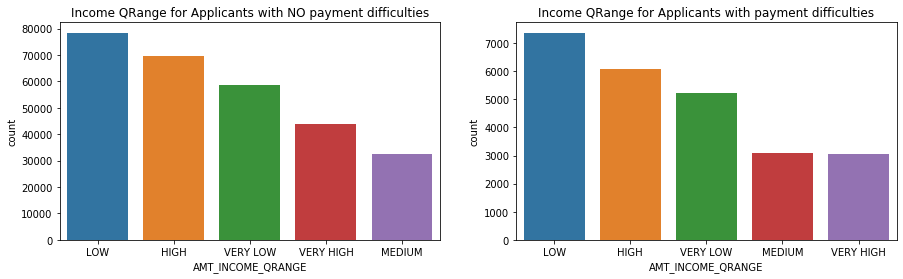

In [112]:
fig, ax =plt.subplots(1,2,figsize=[15,4])

sns.countplot(data=target_0,x = 'AMT_INCOME_QRANGE',order = target_0['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[0])
sns.countplot(data=target_1,x = 'AMT_INCOME_QRANGE',order = target_1['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[1])
ax[0].set_title('Income QRange for Applicants with NO payment difficulties')
ax[1].set_title('Income QRange for Applicants with payment difficulties')
plt.show()

Income QRange for Applicants with NO payment difficulties :
    1. Applicants with medium income range have the lowest count in terms of NO payment difficulties.
    2. Applicants with low income range have the highest count in terms of NO payment difficulties.
Income QRange for Applicants with payment difficulties:
    1. Applicants with Very High Income range have the lowest count in terms of payment difficulties.
    2. Applicants with low income range have the highest count in terms of payment difficulties.

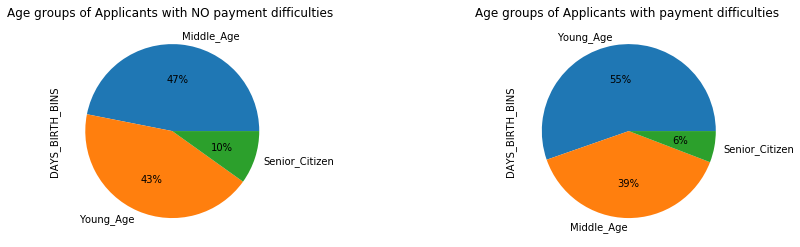

In [113]:
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
target_0.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
target_1.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

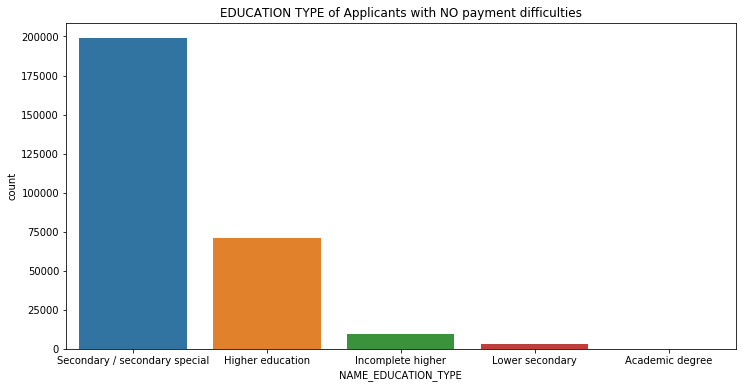

In [114]:
plt.figure(figsize=[12,6])
sns.countplot(data=target_0,x = 'NAME_EDUCATION_TYPE',order = target_0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with NO payment difficulties')
plt.show()

1. We can infer that the Applicants with Secondary Education type have the highest applications with no payment difficulties.


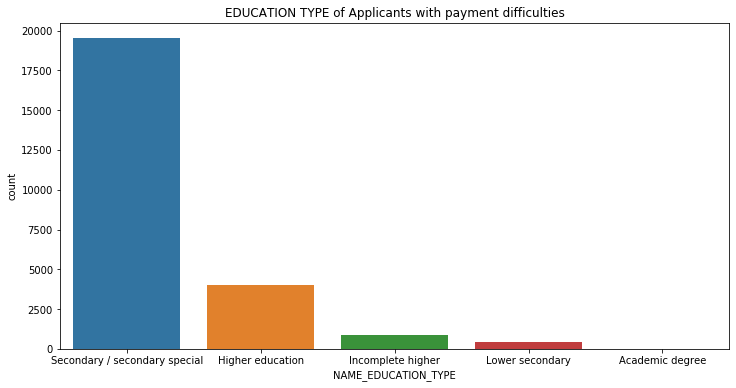

In [115]:
plt.figure(figsize=[12,6])
sns.countplot(data=target_1,x = 'NAME_EDUCATION_TYPE',order = target_1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with payment difficulties')
plt.show()

 1.We can infer that the Applicants with Secondary Education type have the highest applications with payment difficulties.
 
2.Both the above Education plots have a similar profile with respect to payment difficulties.

3.All education types have a lower count in payment difficulties as compared to no payment difficulties.

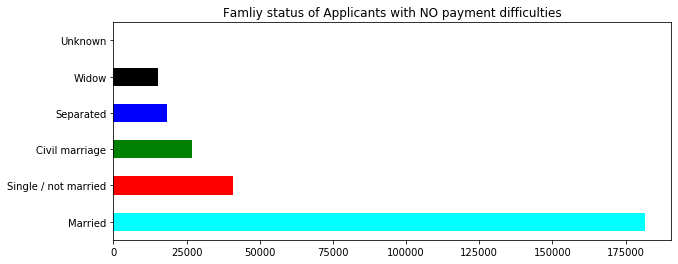

In [119]:
plt.figure(figsize=[10,4])
target_0.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['cyan', 'red', 'green', 'blue', 'black'])
plt.title('Famliy status of Applicants with NO payment difficulties')
plt.show()


1.Married applicants have the highest count with NO payment difficulties.

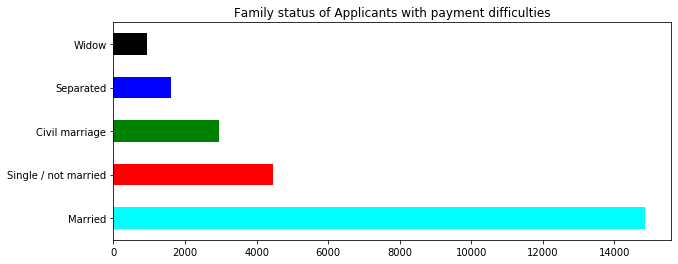

In [120]:
plt.figure(figsize=[10,4])
target_1.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['cyan', 'red', 'green', 'blue', 'black'])
plt.title('Family status of Applicants with payment difficulties')
plt.show()

1.Married applicants have the highest count with payment difficulties.

2.Both the FAMILY STATUS plots have a similar profile with respect to payment difficulties but differ in count.


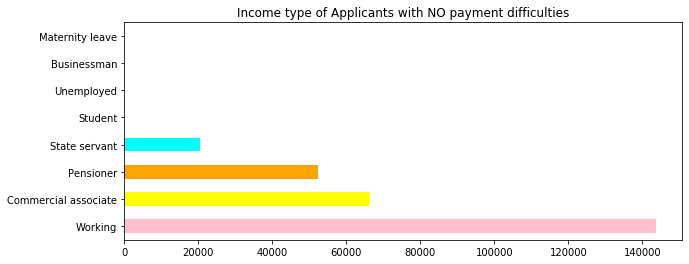

In [140]:
plt.figure(figsize=[10,4])
target_0.NAME_INCOME_TYPE.value_counts().plot.barh(color=['pink','yellow','orange','cyan', 'red', 'green'])
plt.title('Income type of Applicants with NO payment difficulties')
plt.show()

1.Ther are 4 incomes types with no payment difficulties i.e State servant, Pensioner, Commercial associate and Working  whereas the others are insignificant.

2.Among all, Working professionals have the highest count of applications with no payment difficulties.

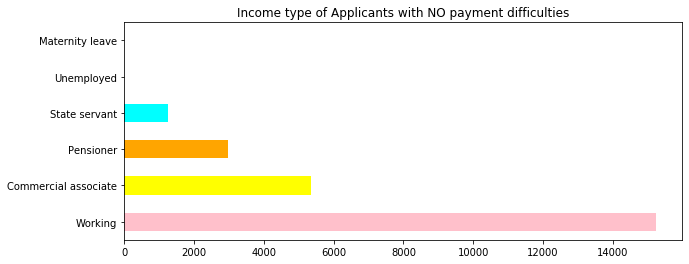

In [142]:
plt.figure(figsize=[10,4])
target_1.NAME_INCOME_TYPE.value_counts().plot.barh(color=['pink','yellow','orange','cyan', 'red', 'green'])
plt.title('Income type of Applicants with NO payment difficulties')
plt.show()

1.Among all, Working professionals have the highest count of applications with payment difficulties whereas State servants have the lowest count of applications.

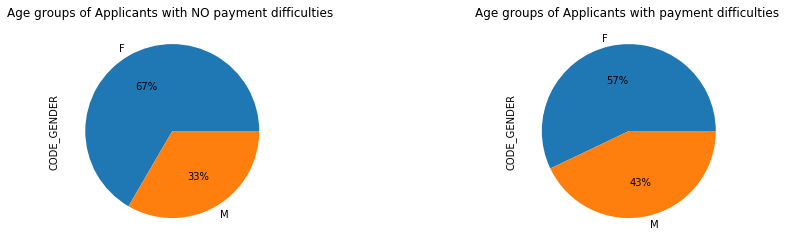

In [143]:
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
target_0.CODE_GENDER.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
target_1.CODE_GENDER.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()


Less number of males take loan but the defaulter percentage is high in case of male.

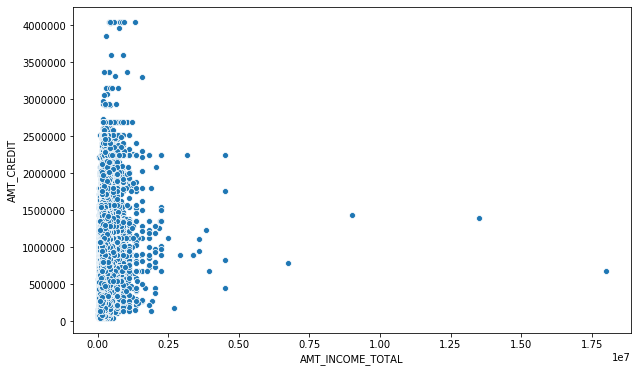

In [144]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=target_0, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT')
plt.show()

From the above scatter plot for Target 0 we can infer that :

1.Maximum credit amount applications are for total income range between 0 to 25 lacs and Applicants with higher total income levels have lesser loan applications.

2.Hence we can infer that total income range between 0 to 25 lacs have the most loan applications.

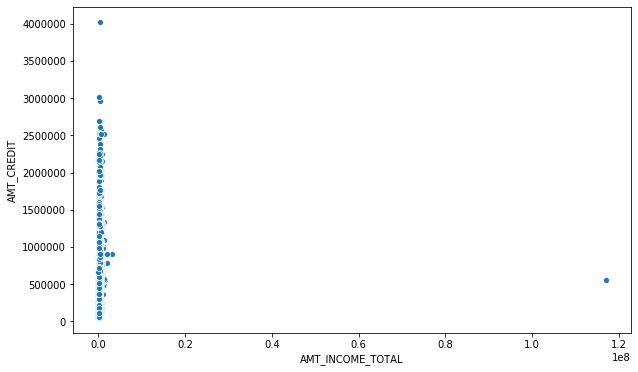

In [145]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=target_1, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT')
plt.show()

From the above scatter plot for Target 1 we can infer that :

1.Maximum loan applications are between the range of approx. 0-5 lakhs for income total.

2.Amount credit for such loan applications ranges between 0-40 lakhs.

3.We can see 1 outlier for income total.

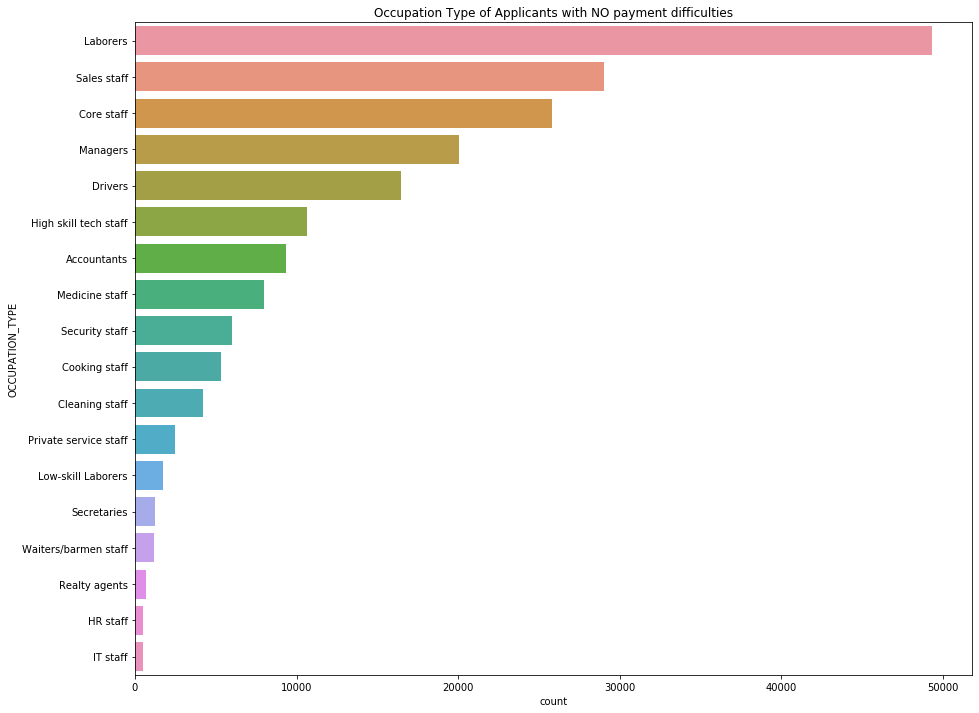

In [147]:
plt.figure(figsize=[15,12])
sns.countplot(data=target_0, y = 'OCCUPATION_TYPE', order=target_0.OCCUPATION_TYPE.value_counts().index)
plt.title('Occupation Type of Applicants with NO payment difficulties')
plt.show()


1.Laborers have the highest amount of applications with no payment difficulties.

2.Sales staff has the second highest amount of applications with no payment difficulties.

3.HR and IT staff have the lowest amount of applications with no payment difficulties.


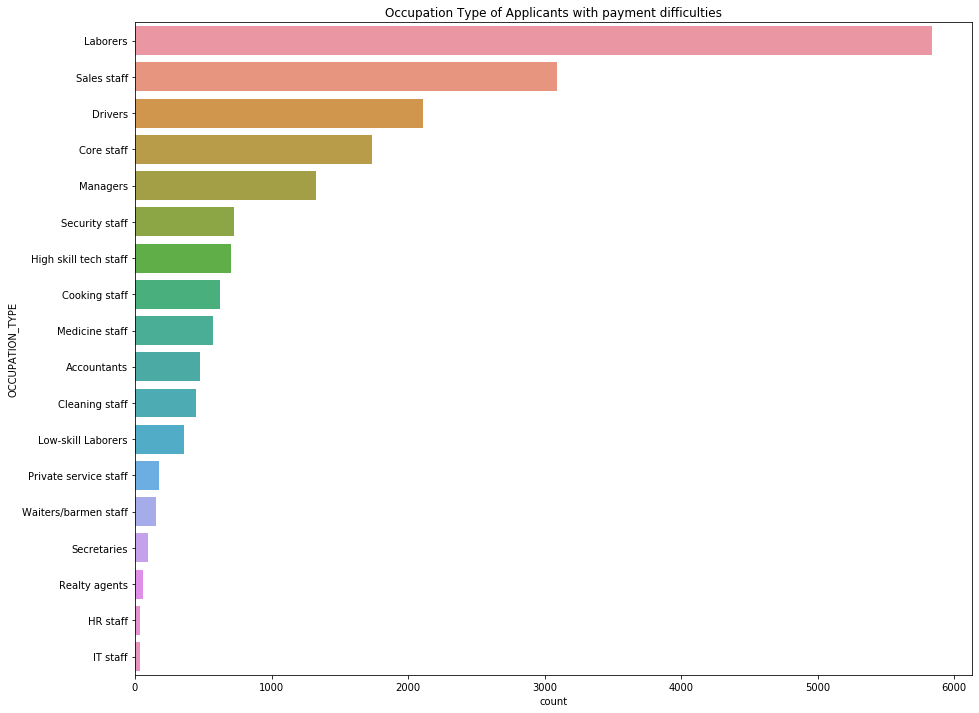

In [148]:
plt.figure(figsize=[15,12])
sns.countplot(data=target_1, y = 'OCCUPATION_TYPE', order=target_1.OCCUPATION_TYPE.value_counts().index)
plt.title('Occupation Type of Applicants with payment difficulties')
plt.show()

1.Laborers have the highest amount of applications with payment difficulties.

2.Drivers have the third highest amount of applications with payment difficulties.

3.From above graphs we can infer Managers and and high skill tech staff are most reliable and suitable for the loan application.

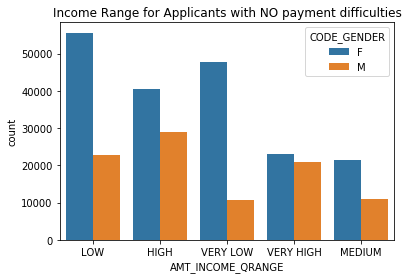

In [149]:
sns.countplot(data=target_0, x = 'AMT_INCOME_QRANGE', order=target_0.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER')
plt.title('Income Range for Applicants with NO payment difficulties')
plt.show()

We can see that the female applicants with NO payment difficulties are more in every buckets of Income range compared to male applicants.

Low Income category  has highest number of applicants,followed by high and so on.

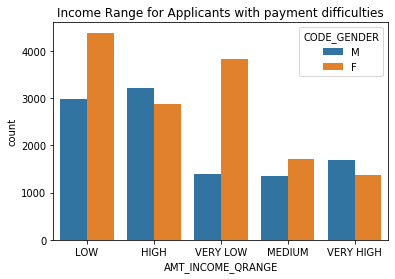

In [150]:
sns.countplot(data=target_1, x = 'AMT_INCOME_QRANGE', order=target_1.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER')
plt.title('Income Range for Applicants with payment difficulties')
plt.show()

The percent of male applicantion with  payment difficulties is high if we compare it with No payment difficulties.

The defaulters are mostly in Low income category followed by high and so on.

## Top 10 correlation for Target variable

In [152]:
# Finding the correlation matrix for numeric columns for Target=0 
target0_corr = target_0[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target0_corr

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.771297,0.418948,0.776421,0.020909,0.075789,-0.012251,-0.104975,-0.039435,-0.014111
AMT_CREDIT,0.771297,1.000000,0.342799,0.987022,0.003081,0.064536,0.047366,-0.070104,-0.013477,0.001464
AMT_INCOME_TOTAL,0.418948,0.342799,1.000000,0.349426,0.027397,0.034256,-0.062494,-0.140392,-0.064937,-0.022896
AMT_GOODS_PRICE,0.776421,0.987022,0.349426,1.000000,-0.000559,0.062763,0.044637,-0.068527,-0.015891,0.003677
CNT_CHILDREN,0.020909,0.003081,0.027397,-0.000559,1.000000,0.878571,-0.336907,-0.245174,-0.185792,0.028751
CNT_FAM_MEMBERS,0.075789,0.064536,0.034256,0.062763,0.878571,1.000000,-0.285806,-0.238301,-0.175630,0.020460
DAYS_BIRTH,-0.012251,0.047366,-0.062494,0.044637,-0.336907,-0.285806,1.000000,0.626028,0.333025,0.270804
DAYS_EMPLOYED,-0.104975,-0.070104,-0.140392,-0.068527,-0.245174,-0.238301,0.626028,1.000000,0.214511,0.276663
DAYS_REGISTRATION,-0.039435,-0.013477,-0.064937,-0.015891,-0.185792,-0.175630,0.333025,0.214511,1.000000,0.100236
DAYS_ID_PUBLISH,-0.014111,0.001464,-0.022896,0.003677,0.028751,0.020460,0.270804,0.276663,0.100236,1.000000


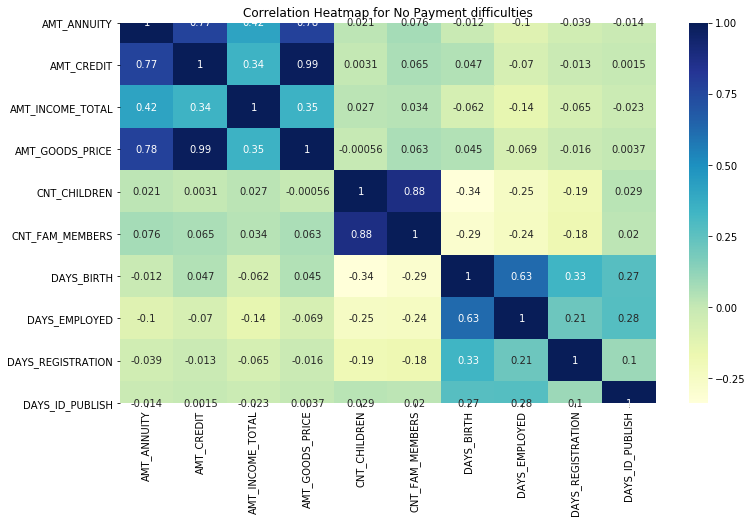

In [153]:
plt.figure(figsize=[12,7])
sns.heatmap(data=target0_corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap for No Payment difficulties')
plt.show()

We can see correlation for the following variables:

1.AMT_CREDIT AND AMT_GOODS_PRICE - Highest correlated

2.CNT_CHILDREN AND CNT_FAM_MEMBERS

3.AMT_GOODS_PRICE AND AMT_ANNUITY

4.AMT_CREDIT AND AMT_ANNUITY

5.DAYS_EMPLOYED AND DAYS_BIRTH





In [154]:
# Finding the correlation matrix for numeric columns for Target=1
target1_corr = target_1[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target1_corr


,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.752195,0.046421,0.752295,0.031257,0.075711,0.014028,-0.081207,-0.034279,0.016767
AMT_CREDIT,0.752195,1.000000,0.038131,0.982783,-0.001675,0.051224,0.135070,0.001930,0.025854,0.052329
AMT_INCOME_TOTAL,0.046421,0.038131,1.000000,0.037591,0.004796,0.006654,-0.003154,-0.014977,-0.000158,0.004215
AMT_GOODS_PRICE,0.752295,0.982783,0.037591,1.000000,-0.008111,0.047367,0.135532,0.006648,0.025661,0.056061
CNT_CHILDREN,0.031257,-0.001675,0.004796,-0.008111,1.000000,0.885484,-0.259222,-0.192864,-0.149154,0.032299
CNT_FAM_MEMBERS,0.075711,0.051224,0.006654,0.047367,0.885484,1.000000,-0.203403,-0.186515,-0.145828,0.031785
DAYS_BIRTH,0.014028,0.135070,-0.003154,0.135532,-0.259222,-0.203403,1.000000,0.582441,0.289116,0.252256
DAYS_EMPLOYED,-0.081207,0.001930,-0.014977,0.006648,-0.192864,-0.186515,0.582441,1.000000,0.192455,0.229090
DAYS_REGISTRATION,-0.034279,0.025854,-0.000158,0.025661,-0.149154,-0.145828,0.289116,0.192455,1.000000,0.096833
DAYS_ID_PUBLISH,0.016767,0.052329,0.004215,0.056061,0.032299,0.031785,0.252256,0.229090,0.096833,1.000000


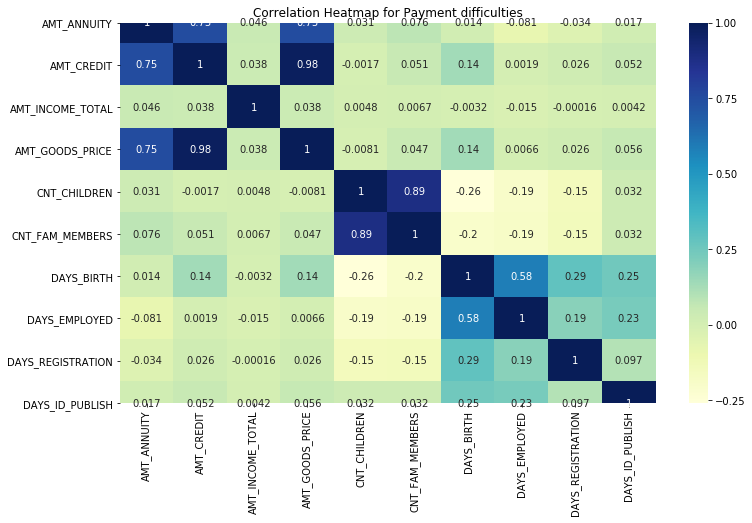

In [155]:
plt.figure(figsize=[12,7])
sns.heatmap(data=target1_corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap for Payment difficulties')
plt.show()

We can see correlation for the following variables:

1.AMT_CREDIT AND AMT_GOODS_PRICE - Highest correlated

2.CNT_CHILDREN AND CNT_FAM_MEMBERS

3.AMT_GOODS_PRICE AND AMT_ANNUITY

# #READING PREVIOUS APPLICATION

In [156]:
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
PreviousApplication.shape

(1670214, 37)

In [159]:
PreviousApplication.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

There are duplicate values in Sk_ID_Curr as a Person could have taken loan multiple times.

In [162]:

PreviousApplication.SK_ID_PREV.value_counts()

1000983    1
2428426    1
1026910    1
1024863    1
2448896    1
          ..
1287969    1
1294114    1
1292067    1
1281828    1
1001961    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

There are no duplicate values in SK_ID_PREV.